# Loading the requirements!

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import PoissonRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

print("done")

done


# Printing The DataFrame

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

# Data Cleaning

In [5]:
# Normalization (dropping the useless columns)
df = df.drop(columns=['Email'])
df = df.drop(columns=['Avatar'])
df = df.drop(columns=['Address'])
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [6]:
# The value of avg session at one or two point is wrong(NaN) so we will replace it with the median

AvgSessionmedian = df['Avg. Session Length'].median()
print(AvgSessionmedian)

df['Avg. Session Length'] = df['Avg. Session Length'].fillna(AvgSessionmedian)
df

33.08852937


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [60]:
df.to_csv("Ecommerce Customers Modified.csv")

# Data Visualization

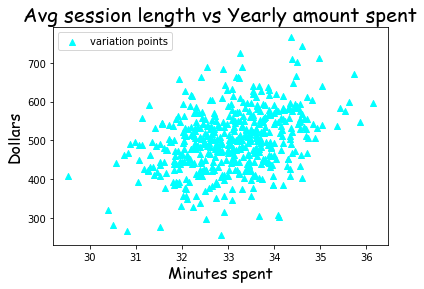

In [61]:
# title
plt.title("Avg session length vs Yearly amount spent",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Avg. Session Length'],df['Yearly Amount Spent'],marker='^',label='variation points',color='cyan')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes spent",fontdict={'fontname':'comic sans MS', 'fontsize':16})
plt.ylabel("Dollars",fontdict={'fontname':'comic sans MS', 'fontsize':16})
# saving the plot
# plt.savefig("YearlyamountspentvsAvgsessionlength.jpg",dpi=300)
# show the graph
plt.show()

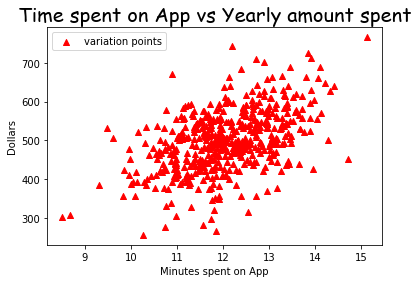

In [62]:
# title
plt.title("Time spent on App vs Yearly amount spent",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Time on App'],df['Yearly Amount Spent'],marker='^',label='variation points',color='red')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes spent on App")
plt.ylabel("Dollars")
# saving the graph
# plt.savefig('Yearly amount spent vs Time spent on App.jpg',dpi=300)
# show the graph
plt.show()

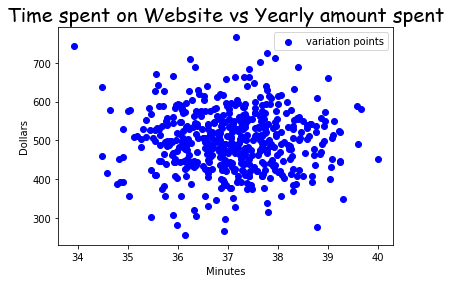

In [63]:
# title
plt.title("Time spent on Website vs Yearly amount spent",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'],marker='o',label='variation points',color='blue')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes")
plt.ylabel("Dollars")
# saving the figure
# plt.savefig('Yearly amount spent vs Time spent on Website.jpg',dpi=300)
# show the graph
plt.show()

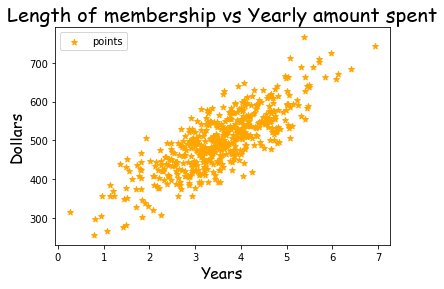

In [64]:
# title
plt.title("Length of membership vs Yearly amount spent",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Length of Membership'],df['Yearly Amount Spent'],color='orange',marker='*',label='points')
# x and y labels
plt.xlabel("Years",fontdict={'fontname':'comic sans MS', 'fontsize':16})
plt.ylabel("Dollars",fontdict={'fontname':'comic sans MS', 'fontsize':16})
# show the legends
plt.legend()
# save the graph
# plt.savefig('Yearly amount spent vs length of membership.jpg',dpi=300)
# show the graph
plt.show()

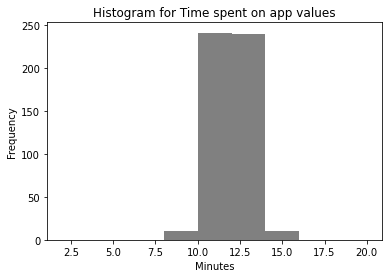

In [65]:
# histogram 

bins = [2,6,8,10,12,14,16,18,20]

plt.title("Histogram for Time spent on app values")

plt.hist(df['Time on App'],bins=bins,color='grey')

plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.show()

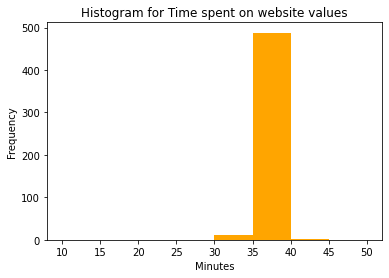

In [66]:
# histogram 

bins = [10,15,20,25,30,35,40,45,50]

plt.title("Histogram for Time spent on website values")

plt.hist(df['Time on Website'],bins=bins,color='orange')

plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.show()

# Regression Model, Possion Regression Model and Decision Tree Regressor

In [87]:
x = df.drop(['Yearly Amount Spent'],axis=1).values 
# print(x)
y = df['Yearly Amount Spent'].values
# print(y)

In [88]:
# splitting the datset
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)

In [9]:
# Naive Method
regression = linear_model.LinearRegression()

# using possions regressors as well

pr = PoissonRegressor()

# using decision tree as well

dt = DecisionTreeRegressor()

In [ ]:
# SVM For Regression
from sklearn.svm import SVR
regressorVec = SVR(kernel = 'rbf')

In [12]:
# Fitting the models

regression.fit(x_train, y_train)

pr.fit(x_train, y_train)

dt.fit(x_train, y_train)

regressorVec.fit(x_train, y_train)

print("Done")

Done


# Let's see some predictions

In [13]:
# Degression model predictions 

pred = regression.predict(x_test)
print(pred)

[403.97223424 542.41477005 427.52512759 501.52968016 410.22045197
 569.75980756 531.57593984 506.33922578 408.5301057  474.14119443
 441.27367712 425.09548562 424.46930117 527.84945416 431.33190497
 423.75613452 575.39177235 484.46975922 457.91360385 481.99885344
 502.19484995 513.47923555 507.17061482 646.68726892 449.90764333
 496.15555413 556.90786944 554.80812258 399.45411977 325.37214958
 533.00478664 478.13197809 500.89859533 305.05093906 505.90122737
 483.43150335 518.73129973 437.68888062 456.58695951 470.95991965
 494.26976064 444.37209327 508.50633887 500.89377262 488.54590466
 535.45844747 595.4209301  514.01728136 280.39511279 432.59331985
 421.83061536 480.89002271 585.14997022 608.99587987 563.82124808
 494.38579408 393.82480144 478.613337   573.14162024 500.12099304
 512.38250676 391.60021902 480.27182443 481.20306413 474.85513809
 546.1878191  430.41801555 601.98567543 421.67719735 493.41412653
 528.90883883 581.67878321 620.29850058 512.26045592 411.52263652
 498.08649

In [14]:
# Possion model predictions 

predictPossion = pr.predict(x_test)

print(predictPossion)

[409.01025421 537.43665959 429.32047356 494.90458448 414.15778809
 567.91730672 523.78945446 500.41908262 411.64171497 469.53346014
 439.70942402 424.76779116 423.76379103 521.50143304 430.94999505
 423.35109172 573.10128351 477.89217147 453.03112048 476.66424234
 494.76134888 506.18080557 500.80764707 661.73151501 446.03949252
 490.10162873 554.94515648 549.88516125 404.55777621 348.47967277
 527.25315132 473.47357766 494.43601045 333.7502494  500.15285721
 476.85483228 513.20516764 435.2427967  453.11172664 466.20123496
 487.61554126 439.96746882 501.59803868 494.92264032 482.5419712
 530.2611662  597.05068771 507.34525696 318.97242173 431.89974867
 423.30364076 475.21942093 587.15356176 614.47907575 561.84064614
 487.107779   398.71366841 471.4412802  570.41146002 495.35899947
 505.16030128 397.29413498 475.58626364 474.7563698  469.23098825
 541.83245738 428.6249152  603.74621045 422.3653026  486.93229007
 522.26817511 580.76579555 629.05001279 506.03177502 413.72750759
 490.683399

In [98]:
# decision tree regression model predictions 

dtPred = dt.predict(x_test)

print(dtPred)

[392.2852442 537.2150527 463.923513  528.4193297 441.8966315 549.0082269
 505.7711403 487.6462317 420.7376732 443.9656268 432.4811686 442.7228916
 456.4695101 562.0820454 432.4811686 410.6029439 571.2160048 488.3875258
 426.1545477 446.4186734 468.4457372 506.42386   475.2634237 610.1280331
 452.1226251 507.4418323 577.7360249 604.3348401 416.3583536 282.4712457
 574.4156896 483.7965221 502.0925279 256.6705823 507.4418323 462.6565189
 513.1531119 456.4695101 432.4811686 469.3108615 505.7711403 432.4720613
 505.7711403 492.9450531 476.1392469 551.0230017 581.7987977 506.42386
 350.0582002 427.3565308 424.675281  476.1392469 591.7810894 632.1235881
 544.4092722 505.7711403 338.3198626 432.4720613 551.0230017 513.1531119
 528.4193297 338.3198626 507.4418323 497.81193   479.7319491 537.7731625
 444.0538266 582.4919237 439.8912805 536.1308969 537.9157529 554.900783
 662.9610878 537.2150527 413.2959992 495.2994425 473.9498574 424.7626355
 483.5431939 491.9115051 546.5566669 640.18774   475.7

# Sample predictions

In [16]:

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

regression.predict(ExtraDf.values)

array([595.49738966])

In [24]:
pr.predict(ExtraDf.values)

array([597.1367661])

In [17]:
dt.predict(ExtraDf.values)

array([581.7987977])

# let's see accuracy of our model

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9824283812211903

In [19]:
r2_score(y_test,predictPossion)

0.9642632590619834

In [20]:
r2_score(y_test,dtPred)

0.8421324774312543

## Comparsion using Cross-validation

In [76]:
x1 = x.astype(int)

In [64]:
y1 = y.astype(int)

In [81]:
cross_val_score(regression,x1,y1)

array([0.90237809, 0.90416952, 0.92973247, 0.92743668, 0.90601448])

In [82]:
cross_val_score(pr,x1,y1)

array([0.88795976, 0.89922003, 0.90942722, 0.91656087, 0.89148492])

In [83]:
cross_val_score(dt,x1,y1)

array([0.85183102, 0.79033703, 0.84123307, 0.82686653, 0.81126018])

## Using confusion matrix

In [142]:
newY = pd.DataFrame({'Yearly spent':y_test.astype(int)})

newY

,Yearly spent
0,401
1,534
2,418
3,503
4,410
...,...
170,490
171,744
172,327
173,506


In [114]:
myLinearPred = pd.DataFrame({'Predicted Yeatly spent value':pred.astype(int)})

myPossionPred = pd.DataFrame({'Predicted Yeatly spent value':predictPossion.astype(int)})

myDtPred = pd.DataFrame({'Predicted Yeatly spent value':dtPred.astype(int)})

Confusion matrix for linear regression



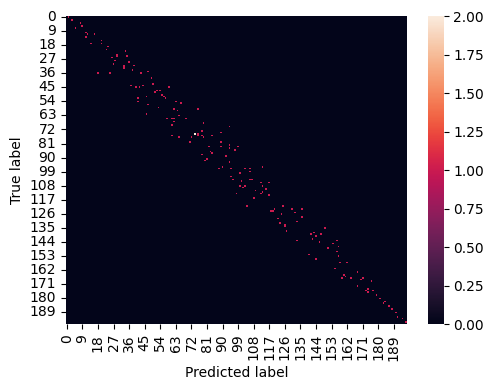

In [144]:
print("Confusion matrix for linear regression\n")

cm = confusion_matrix(newY,myLinearPred)

cmdf = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sn.heatmap(cmdf)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Confusion matrix for possion regression



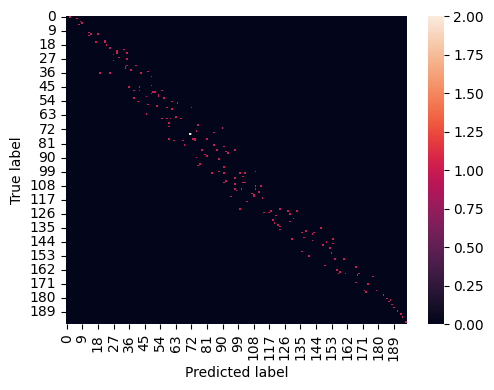

In [102]:
print("Confusion matrix for possion regression\n")

cm = confusion_matrix(y_test.astype(int),predictPossion.astype(int))

cmdf = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sn.heatmap(cmdf)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Confusion matrix for possion regression



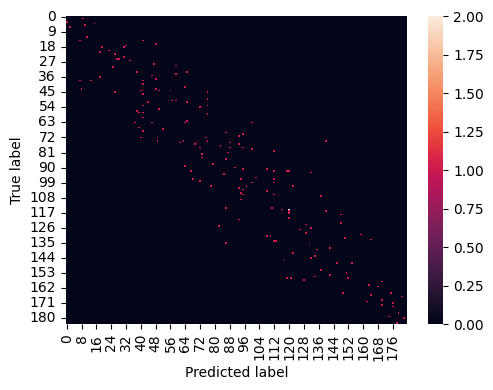

In [100]:
print("Confusion matrix for possion regression\n")

cm = confusion_matrix(y_test.astype(int),dtPred.astype(int))

cmdf = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sn.heatmap(cmdf)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Mean square error

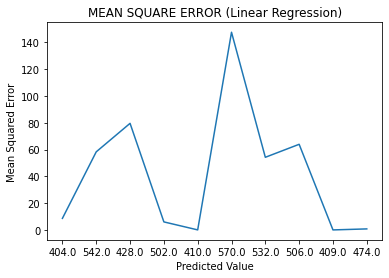

In [120]:
errors = list()
errorsPossion = list()
errorsDT = list()
for i in range(len(y_test[:10])):
	# calculate error
	err = (y_test[i] - pred[i])**2
	errP = (y_test[i] - predictPossion[i])**2
	errD = (y_test[i] - dtPred[i])**2
	# store error
	errors.append(err)
	errorsPossion.append(errP)
	errorsDT.append(errD)
	# report error
# plot errors
plt.title("MEAN SQUARE ERROR (Linear Regression)")
plt.plot(errors)
# pred['Yearly Amount Spent'].astype('int64')
plt.xticks(ticks=[i for i in range(len(errors[:10]))], labels=pred[:10].round())
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

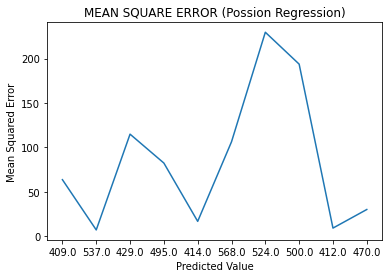

In [127]:
plt.title("MEAN SQUARE ERROR (Possion Regression)")
plt.plot(errorsPossion)
# pred['Yearly Amount Spent'].astype('int64')
plt.xticks(ticks=[i for i in range(len(errorsPossion[:10]))], labels=predictPossion[:10].round(),color="black")
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

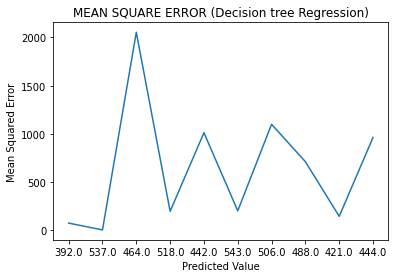

In [128]:
plt.title("MEAN SQUARE ERROR (Decision tree Regression)")
plt.plot(errorsDT)
# pred['Yearly Amount Spent'].astype('int64')
plt.xticks(ticks=[i for i in range(len(errorsDT[:10]))], labels=dtPred[:10].round(),color="black")
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

# Plotting the results

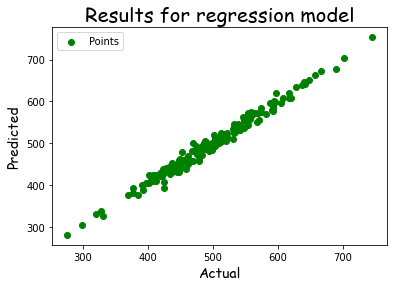

In [82]:
# figure size
# plt.figure(figsize={5,8})
# title 
plt.title("Results for regression model", fontdict={'fontname': 'comic sans MS', 'fontsize': 20})
# plot graph
plt.scatter(y_test,pred,color='green',label="Points",marker='o')
# x and y
plt.xlabel("Actual",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
plt.ylabel("Predicted",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
# legends
plt.legend(loc='upper left');
# saving the plot
plt.savefig("Results.png",dpi=300)
# show graph
plt.show()

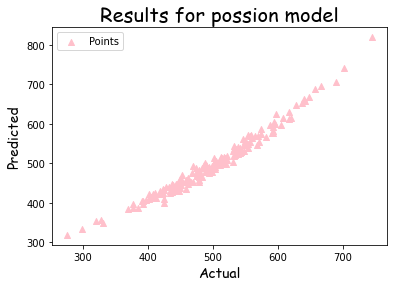

In [83]:
# figure size
# plt.figure(figsize={5,8})
# title 
plt.title("Results for possion model", fontdict={'fontname': 'comic sans MS', 'fontsize': 20})
# plot graph
plt.scatter(y_test,predictPossion,color='pink',label="Points",marker='^')
# x and y
plt.xlabel("Actual",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
plt.ylabel("Predicted",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
# legends
plt.legend(loc='upper left');
# saving the plot
plt.savefig("ResultsPossion.png",dpi=300)
# show graph
plt.show()

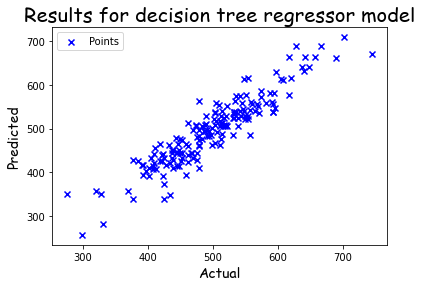

In [84]:
# figure size
# plt.figure(figsize={5,8})
# title 
plt.title("Results for decision tree regressor model", fontdict={'fontname': 'comic sans MS', 'fontsize': 20})
# plot graph
plt.scatter(y_test,dtPred,color='blue',label="Points",marker='x')
# x and y
plt.xlabel("Actual",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
plt.ylabel("Predicted",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
# legends
plt.legend(loc='upper left');
# saving the plot
plt.savefig("ResultsPossion.png",dpi=300)
# show graph
plt.show()

In [85]:
from sklearn.tree import export_graphviz 

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dt, out_file ='tree.dot',
                feature_names =['Session Length','Time on App','Time on Website','Length of Membership']) 

<img src='./GraphvizDecisionTree.jpg'><img>

# Line graph for linear regression, possion regression and decisionTree regression

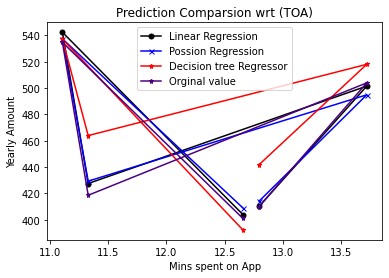

In [86]:
plt.title("Prediction Comparsion wrt (TOA)")

plt.plot(df['Time on App'][:5],pred[:5],label="Linear Regression",linestyle='-',marker='o',markersize=5,color='black')

plt.plot(df['Time on App'][:5],predictPossion[:5],label="Possion Regression",linestyle='-',marker='x',markersize=5,color='blue')

plt.plot(df['Time on App'][:5],dtPred[:5],label="Decision tree Regressor",linestyle='-',marker='*',markersize=5,color='red')

# original line
plt.plot(df['Time on App'][:5],y_test[:5],label="Orginal value",linestyle='-',marker='*',markersize=5,color='indigo')

plt.ylabel("Yearly Amount")
plt.xlabel("Mins spent on App")

plt.legend()

plt.show()

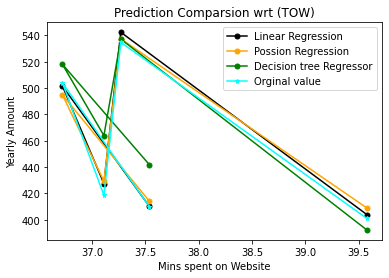

In [87]:
plt.title("Prediction Comparsion wrt (TOW)")

plt.plot(df['Time on Website'][:5],pred[:5],label="Linear Regression",linestyle='-',marker='o',markersize=5,color='black')

plt.plot(df['Time on Website'][:5],predictPossion[:5],label="Possion Regression",linestyle='-',marker='o',markersize=5,color='orange')

plt.plot(df['Time on Website'][:5],dtPred[:5],label="Decision tree Regressor",linestyle='-',marker='o',markersize=5,color='green')

plt.plot(df['Time on Website'][:5],y_test[:5],label="Orginal value",linestyle='-',marker='*',markersize=5,color='cyan')

plt.ylabel("Yearly Amount")
plt.xlabel("Mins spent on Website")

plt.legend()

plt.show()

# Creating a results csv


In [88]:
results = pd.DataFrame({'Actual Values': y_test,'Predicted Values (regression)':pred,'Predicted Values (Possion)':predictPossion,'Predict Values (Decision tree)': dtPred,'Difference (regession)': y_test-pred,'Difference (possion)':y_test - predictPossion,'Difference (decision tree)':y_test - dtPred})
results.head(10)
results.to_csv('Results.csv') 

# Maths behind regression model

In [89]:
m = regression.coef_
c = regression.intercept_

print('m :',m)
print('c :',c)

m1 = m[0]
m2 = m[1]
m3 = m[2]
m4 = m[3]

y = m1*(34.5) + m2*(12.66) + m3*(39.58)+ m4*(4.08) + c
print(y)

m : [25.71885172 38.45683394  0.57724722 61.96992149]
c : -1054.351236818422
595.4973896575809


In [90]:
# for possion regression
import math

b = pr.coef_
c = pr.intercept_

b1 = b[0]
b2 = b[1]
b3 = b[2]
b4 = b[3]

print("B : ", b)
print("c :", c)

y = math.e**(b1*34.5 + b2*12.66 + b3*39.58 + b4*4.08 + c)

print(y)

B :  [0.04987418 0.07614395 0.00173389 0.12488947]
c : 3.1293281277962164
597.136766099022


# Where should the company put their attention Website or App? (Manual Proof) (Linear Regression)

In [91]:
# we will keep everything constant and will be changing only time on app value

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val1 = regression.predict(ExtraDf.values)[0]
print(val1)

# second phase

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[14.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val2 = regression.predict(ExtraDf.values)[0]
print(val2)

# third 

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[16.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val3 = regression.predict(ExtraDf.values)[0]
print(val3)

listIncInyearlyAmtSpent1 = [val1,val2,val3]
print(listIncInyearlyAmtSpent1)

595.4973896575809
672.4110575417176
749.3247254258542
[595.4973896575809, 672.4110575417176, 749.3247254258542]


In [92]:
# we will keep everything constant and we be changing only time on website

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val1 = regression.predict(ExtraDf.values)[0]
print(val1)

# second phase

ExtraDf = pd.DataFrame({'Avg. Session Length':[36.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val2 = regression.predict(ExtraDf.values)[0]
print(val2)

# third 

ExtraDf = pd.DataFrame({'Avg. Session Length':[38.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val3 = regression.predict(ExtraDf.values)[0]
print(val3)

listIncInyearlyAmtSpent2 = [val1,val2,val3]
print(listIncInyearlyAmtSpent2)

595.4973896575809
646.9350930890771
698.3727965205735
[595.4973896575809, 646.9350930890771, 698.3727965205735]


In [93]:
newList = []

newList = np.array(listIncInyearlyAmtSpent1) - np.array(listIncInyearlyAmtSpent2)

newList

array([ 0.        , 25.47596445, 50.95192891])

# As we can see the difference between the values the company should clearly focus on app 